# Multiple Linear Regression


## Objectives

* Use scikit-learn to implement multiple linear regression
* Create, train, and test a multiple linear regression model on real data.

## Import needed packages

- Numpy
- Matplotlib
- Pandas
- Scikit-learn

Execute these cells to check if you have the above packages



In [1]:
!pip install -q numpy pandas scikit-learn matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Load the data

Use pandas to load the data

In [3]:
df = pd.read_csv('my2026-fuel-consum.csv')
# verify successful load with some randomly selected records
df.sample(5)

,ModelYear,Make,Model,VehicleClass,EngineSize (L),Cylinders,Transmission,FuelType,FuelConsumptionCity,FuelConsumptionHighway,FuelConsumptionCombW,FuelConsumptionCombMpg,CO2emissions (g/km),CO2rating,SmogRating
277,2026,Lexus,GX 550,Sport utility vehicle: Standard,3.4,6,AS10,Z,15.3,11.2,13.5,21,315,3,4
405,2026,Toyota,Prius AWD,Mid-size,2.0,4,AV,X,4.8,4.7,4.8,59,111,8,6
22,2026,BMW,M2 Coupe,Subcompact,3.0,6,M6,Z,14.7,10.0,12.6,22,294,4,4
312,2026,Mazda,Mazda3 5-Door 4WD,Mid-size,2.5,4,AS6,X,9.3,7.0,8.3,34,194,5,6
223,2026,Hyundai,Tucson AWD,Sport utility vehicle: Small,2.5,4,AS8,X,9.7,7.7,8.8,32,207,5,6


# Exploration & Variable Selection

In [4]:
df.describe()

,ModelYear,EngineSize (L),Cylinders,FuelConsumptionCity,FuelConsumptionHighway,FuelConsumptionCombW,FuelConsumptionCombMpg,CO2emissions (g/km),CO2rating,SmogRating
count,437.0,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000
mean,2026.0,3.051945,5.427918,12.097712,9.372311,10.873227,28.082380,255.219680,4.409611,4.956522
std,0.0,1.305678,1.876325,3.495363,2.308001,2.896746,8.522371,67.033008,1.340683,1.371544
min,2026.0,1.200000,3.000000,4.400000,4.400000,4.400000,15.000000,104.000000,1.000000,2.000000
25%,2026.0,2.000000,4.000000,9.600000,7.600000,8.800000,22.000000,204.000000,4.000000,4.000000
50%,2026.0,2.700000,4.000000,12.000000,9.300000,10.700000,26.000000,259.000000,4.000000,5.000000
75%,2026.0,3.500000,6.000000,14.600000,10.700000,12.700000,32.000000,298.000000,5.000000,6.000000
max,2026.0,6.700000,12.000000,23.500000,16.600000,19.200000,64.000000,451.000000,8.000000,7.000000


## Summary Statistics Explanation

### Count
- Represents the total number of vehicles in the dataset.
- All variables have **437 observations**.

### Model Year
- All vehicles are from the **2026 model year**.
- This is why the mean, minimum, and maximum values are the same.

### Engine Size (L)
- The average engine size is **3.05 liters**.
- Engine sizes range from **1.2 L to 6.7 L**.

### Cylinders
- Vehicles have between **3 and 12 cylinders**.
- Most vehicles have **4 to 6 cylinders**.

### Fuel Consumption (Combined)
- Average combined fuel consumption is **10.9 L/100km**.
- This combines city and highway driving.

### Fuel Consumption (MPG)
- Average fuel efficiency is **28 mpg**.
- Higher MPG indicates better fuel efficiency.

### CO₂ Emissions (g/km)
- Average CO₂ emissions are **255 g/km**.
- Higher values mean greater environmental impact.

In [5]:
print(df.columns)

Index(['ModelYear', 'Make', 'Model', 'VehicleClass', 'EngineSize (L)',
       'Cylinders', 'Transmission', 'FuelType', 'FuelConsumptionCity',
       'FuelConsumptionHighway', 'FuelConsumptionCombW',
       'FuelConsumptionCombMpg', 'CO2emissions (g/km)', 'CO2rating',
       'SmogRating'],
      dtype='object')


In [6]:
# Drop categoricals 
df = df.drop(columns=[
    'Make',
    'Model',
    'VehicleClass',
    'Transmission',
    'FuelType',
    'ModelYear'
])



Checking the level of independence between variables after eliminating categoricals

Use correlation matrix.
It helps to indicate the independence between the variables
It helps to indicate how predictive each variable is of the target

Take out strong dependencies or correlation between variables by selecting the best one from each correlated group.

In [7]:
df.corr()

,EngineSize (L),Cylinders,FuelConsumptionCity,FuelConsumptionHighway,FuelConsumptionCombW,FuelConsumptionCombMpg,CO2emissions (g/km),CO2rating,SmogRating
EngineSize (L),1.000000,0.931320,0.801051,0.703392,0.783263,-0.647886,0.779639,-0.738843,-0.472105
Cylinders,0.931320,1.000000,0.792602,0.665993,0.764341,-0.637325,0.768058,-0.730862,-0.556019
FuelConsumptionCity,0.801051,0.792602,1.000000,0.905309,0.987968,-0.927857,0.972824,-0.952045,-0.543461
FuelConsumptionHighway,0.703392,0.665993,0.905309,1.000000,0.959836,-0.879482,0.945374,-0.914411,-0.384175
FuelConsumptionCombW,0.783263,0.764341,0.987968,0.959836,1.000000,-0.931207,0.984736,-0.959811,-0.497513
FuelConsumptionCombMpg,-0.647886,-0.637325,-0.927857,-0.879482,-0.931207,1.000000,-0.932406,0.938295,0.471039
CO2emissions (g/km),0.779639,0.768058,0.972824,0.945374,0.984736,-0.932406,1.000000,-0.973815,-0.505019
CO2rating,-0.738843,-0.730862,-0.952045,-0.914411,-0.959811,0.938295,-0.973815,1.000000,0.501151
SmogRating,-0.472105,-0.556019,-0.543461,-0.384175,-0.497513,0.471039,-0.505019,0.501151,1.000000


## Correlation Analysis 
 Focus on the target variable

**Target:** `CO2emissions (g/km)` 

Most variables show a strong correlation with the target:

- `FuelConsumptionCombW` → 0.985  
- `FuelConsumptionCity` → 0.973  
- `FuelConsumptionHighway` → 0.945  
- `EngineSize (L)` → 0.780  
- `Cylinders` → 0.768  

 This indicates that these features are good candidates for predicting CO2 emissions.

 Examining correlations between predictors

- `EngineSize (L)` and `Cylinders` are highly correlated (0.931).  
  - Since `EngineSize (L)` is more strongly correlated with the target (0.780 > 0.768), we can **drop `Cylinders`**.

- The fuel consumption variables are highly correlated with each other:  
  - `FuelConsumptionCity`, `FuelConsumptionHighway`, `FuelConsumptionCombW`, `FuelConsumptionCombMpg`  
  - Among these, `FuelConsumptionCombW` is most correlated with the target (0.985).  
  - Therefore, we can **drop the others**:  
    - `FuelConsumptionCity`  
    - `FuelConsumptionHighway`  
    - `FuelConsumptionCombMpg`

- `FuelConsumptionCombW` and `FuelConsumptionCombMpg` are not perfectly correlated (−0.931).  
  - This might be due to differences in units or data quality, which should be checked in practice.

- Other variables like `CO2rating` (−0.974) and `SmogRating` (−0.505) also correlate with CO2 emissions, but less strongly.


In [8]:
df = df.drop(
    ['Cylinders', 'FuelConsumptionCity', 'FuelConsumptionHighway', 'FuelConsumptionCombMpg', 'CO2rating', 'SmogRating'],
    axis=1
)


In [9]:
df.head(5)

,EngineSize (L),FuelConsumptionCombW,CO2emissions (g/km)
0,2.0,8.5,200
1,3.0,10.2,241
2,3.0,10.0,234
3,3.0,11.7,275
4,3.0,12.1,285


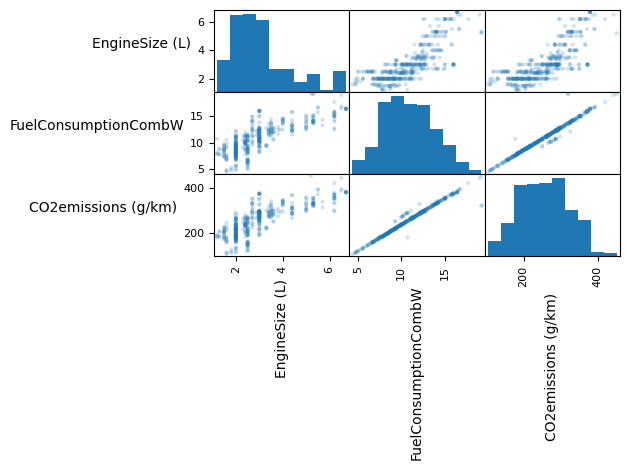

In [10]:
axes = pd.plotting.scatter_matrix(df, alpha=0.2)
# need to rotate axis labels so we can read them
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
    
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()


 Key Findings

**Relationships Between Variables:**
- **Engine Size - Fuel Consumption:** Positive correlation (larger engines use more fuel)
- **Engine Size - CO2 Emissions:** Strong positive correlation (larger engines produce more CO2)
- **Fuel Consumption - CO2 Emissions:** Very strong linear relationship (almost perfect correlation)

 Implications for Predicting CO2 Emissions

- **Best predictor:** Fuel Consumption has the strongest linear relationship with CO2 Emissions
- **Secondary predictor:** Engine Size also shows good predictive power
- **Multicollinearity note:** Engine Size and Fuel Consumption are correlated with each other, which may affect coefficient interpretation in multiple linear regression
- **Linear relationships:** All relationships appear linear, making them suitable for linear regression modeling

 Conclusion
Both Engine Size and Fuel Consumption can be used to predict CO2 Emissions, with Fuel Consumption being the stronger predictor.

## Extract the input variables 

 Extract the required columns and convert the resulting dataframes to NumPy arrays.

- `.iloc[:, [0, 1]]` → selects columns 0 and 1 as a 2D array
-  `.iloc[:, 2]` → selects column 2 as a 1D array
-  `.to_numpy()` → converts to NumPy arrays (needed for scikit-learn)

In [11]:
X = df.iloc[:,[0,1]].to_numpy()
Y = df.iloc[:,[2]].to_numpy()

## Preprocess selected variables

Standardize the input features so the model doesn't inadvertently favor any feature due to its magnitude. 

To do this is to subtract the mean and divide by the standard deviation. 

Scikit-learn does the above.


In [12]:
from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X)

**Purpose:**  
Scale all features to have **mean = 0** and **standard deviation = 1**.

**Why:**  
Features like `EngineSize (L)` and `FuelConsumptionCombW` have different units and ranges. Standardization ensures that **no single feature dominates** due to its scale.

**Important:**  
Only standardize the **features (`X`)**, not the **target (`Y`)**.

In [13]:
pd.DataFrame(X_std).describe().round(2)

,0,1
count,437.00,437.00
mean,-0.00,-0.00
std,1.00,1.00
min,-1.42,-2.24
25%,-0.81,-0.72
50%,-0.27,-0.06
75%,0.34,0.63
max,2.80,2.88


## Create train and test datasets

Randomly split your data into train and test sets, using 80% of the dataset for training and reserving the remaining 20% for testing.


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_std,Y,test_size=0.2,random_state=42)

 ## Build a multiple linear regression model
 
 Multiple linear regression model can be implemented with exactly the same scikit-learn tools.


In [15]:
from sklearn import linear_model

#create a model object
regressor = linear_model.LinearRegression()

#train the model in the training data
regressor.fit(X_train, Y_train)

#print the coefficients
coef_ = regressor.coef_
intercept_ = regressor.intercept_

print('Coefficients: ', coef_)
print('Intercept: ', intercept_)

Coefficients:  [[ 1.72063924 64.16734176]]
Intercept:  [255.25280559]



 Linear Regression Output

- 1.72063924 → the coefficient for EngineSize (L)  
  for every 1 unit increase in EngineSize (L), CO2 increases by ~1.72 units, holding the other feature constant.

- 64.16734176 → the coefficient for FuelConsumptionCombW  
  for every 1 unit increase in FuelConsumptionCombW, CO2 increases by ~64.17 units, holding the other feature constant.

- Intercept: 255.25280559  
  This is the predicted CO2emissions when all features are zero.



In [16]:
# Get the standard scaler's mean and standard deviation parameters
means_ = std_scaler.mean_
std_devs_ = np.sqrt(std_scaler.var_)

# The least squares parameters can be calculated relative to the original, unstandardized variable 
coef_original = coef_ / std_devs_
intercept_original = intercept_ - np.sum((means_ *coef_) / std_devs_)

print('Coefficients: ', coef_original)
print('Intercept: ', intercept_original)


Coefficients:  [[ 1.31932305 22.17691112]]
Intercept:  [10.0917255]


Intercept Interpretation

- The intercept is 10.09 g/km, which is the predicted CO2 emissions when EngineSize = 0 and FuelConsumptionCombW = 0.  
- Physically, CO2 should be zero in this case, so the non-zero intercept reflects the **limitations of the linear model**.  

 Why it happens

- CO2 emissions do not have a perfectly linear relationship with the features.  
- Outliers in the dataset may influence the best-fit line.  
- Some variables may still be correlated, affecting the intercept.  

**Key point:** The small non-zero intercept does not invalidate the model; it is a normal consequence of fitting a linear model to real-world data.


## Visualize model outputs

You can visualize the goodness-of-fit of the model to the training data by plotting each variable separately as a best-fit line using the corresponding regression parameters.

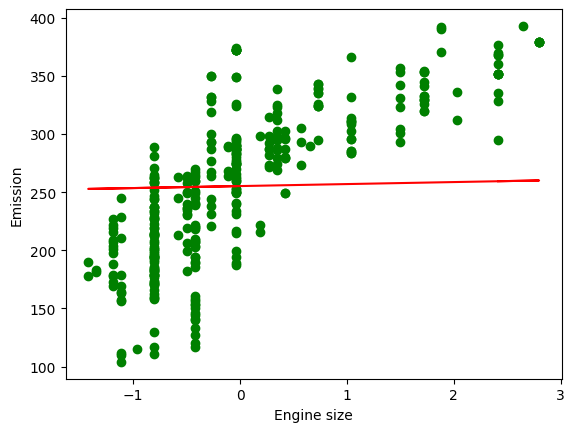

In [17]:
plt.scatter(X_train[:,0], Y_train,  color='green')
plt.plot(X_train[:,0], coef_[0,0] * X_train[:,0] + intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

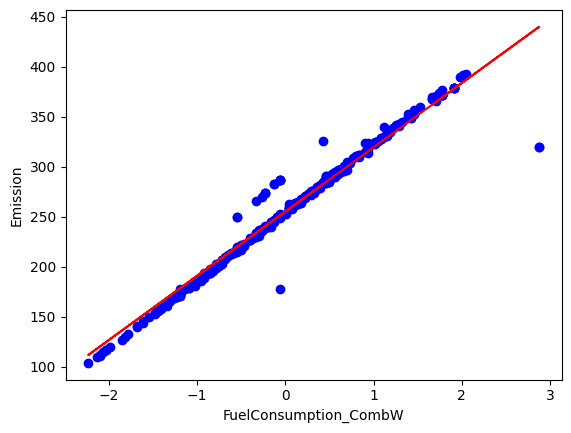

In [18]:
plt.scatter(X_train[:,1], Y_train,  color='blue')
plt.plot(X_train[:,1], coef_[0,1] * X_train[:,1] + intercept_[0], '-r')
plt.xlabel("FuelConsumption_CombW")
plt.ylabel("Emission")
plt.show()

## Model Evaluation


In [19]:
#Trained model to predict on the test set
Y_pred = regressor.predict(X_test)

# Comparison of predicted & Actuals
print(Y_pred[:5])
print(Y_test[:5])


[[228.37413862]
 [304.17143333]
 [298.33511189]
 [222.90845603]
 [205.00983677]]
[[228]
 [307]
 [299]
 [221]
 [204]]


In [20]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, Y_pred)
r2  = r2_score(Y_test, Y_pred)

print("MSE:", mse)
print("R²:", r2)

MSE: 38.307989152146924
R²: 0.9923296158951336


## Model Performance Interpretation

- **Mean Squared Error (MSE = 38.31):**  
  On average, the model’s predictions are very close to the actual CO₂ emission values, indicating low prediction error.

- **R² = 0.99:**  
  The model explains about **99% of the variation** in CO₂ emissions, showing an excellent fit on the test data.


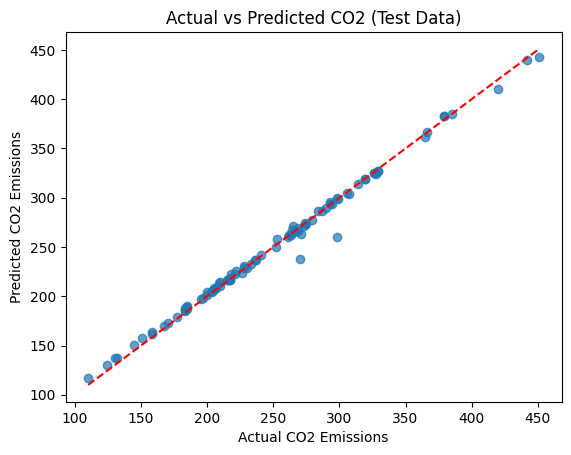

In [21]:

#Actual vs Predicted (Plot)
plt.scatter(Y_test, Y_pred, alpha=0.7)
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()], 'r--')

plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 (Test Data)')
plt.show()


# Multiple Linear Regression Results - Simple Explanation

## The Regression Equation
**CO2 Emissions = 10.09 + 1.32(Engine Size) + 22.18(Fuel Consumption)**


### Coefficient 1: Engine Size = 1.32
- For every 1 liter increase in engine size, CO2 emissions increase by **1.32 g/km**
- **Small effect** - this matches what we saw in Plot 1 (green) where the relationship was weak

### Coefficient 2: Fuel Consumption = 22.18
- For every 1 unit increase in fuel consumption, CO2 emissions increase by **22.18 g/km**
- **HUGE effect** - this matches what we saw in Plot 2 (blue) where the relationship was very strong

### Intercept = 10.09
- The baseline CO2 emission when both predictors are zero (not meaningful in practice)


###  Model Performance on Test Data

- **R² = 0.99**, meaning the model explains about **99% of the variation** in CO2 emissions.
- **MSE = 38.31**, indicating very small prediction errors on unseen data.


### Actual vs Predicted CO2 Emissions (Test Data)

- The predicted values lie very close to the actual values.


### Simple Takeaway
**Fuel Consumption is 17 times more important than Engine Size** in predicting CO2 emissions (22.18 ÷ 1.32 ≈ 17). 
- The plots visually showed this: tight blue line vs scattered green points.
- The strong model performance and the close match between actual and predicted values confirm that the linear model is both accurate and reliable for this dataset.